In [99]:
import torch.nn as nn
import pandas as pd
import json
import os
import numpy as np
import pickle
import json
import scipy
from torch.utils.data import Dataset, DataLoader
import torch
from collections import defaultdict
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# define random seeds for Neural Networks
torch.manual_seed(0)
np.random.seed(0)

# ignore warnings jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [100]:
# load config file
with open('../utils/configs.json') as f:
    config = json.load(f)

In [101]:
# laod outlier scores
outlier_score_path = '../results/hauge/outlier_scores/AE'

In [102]:
def base_df(start_date = '2018-01-01', end_date = '2020-03-31'):
    # generate all the dates between start and end date with 5 minutes interval
    dates = pd.date_range(start_date, end_date, freq='5min')
    df = pd.DataFrame(index=dates)
    df.index.name = 'timestamp'
    return df

In [104]:
correlated_results = {}
# for each trajectory, direction and intersection, run AE model
for trajectory in config['trajectories']:
    correlated_results[trajectory] = {}
    for direction in config['trajectories'][trajectory]:
        print(trajectory, direction)
        df = base_df()
        for intersection in config['trajectories'][trajectory][direction]:
            file_path = os.path.join(outlier_score_path,intersection+'_'+direction+'.csv')
            df_intersection = pd.read_csv(file_path) # load outlier scores
            df_intersection['timestamp'] = pd.to_datetime(df_intersection['timestamp']) # convert timestamp to datetime
            df_intersection.set_index('timestamp',inplace=True) # set timestamp as index
            df_intersection = df_intersection.rename(columns={'outlier_score':intersection})
            df = df.merge(df_intersection, on='timestamp', how='inner') # merge outlier scores with base df
        # save the results
        correlated_results[trajectory][direction]= df


T1 North
T1 South
T2 South
T2 North


In [115]:
# save the results as pickle file
with open('../results/hauge/outlier_scores/AE/correlated_results.pickle', 'wb') as f:
    pickle.dump(correlated_results,f)

In [105]:
def plot_heatmap(df, trajectory,direction):
    fig, ax = plt.subplots(facecolor='w')
    sns.heatmap(df.corr())
    plt.title(f"Correlations for {trajectory} {direction}")
    plt.xlabel('Intersection')
    plt.ylabel('Intersection')
    plt.show()
    return

T1 North


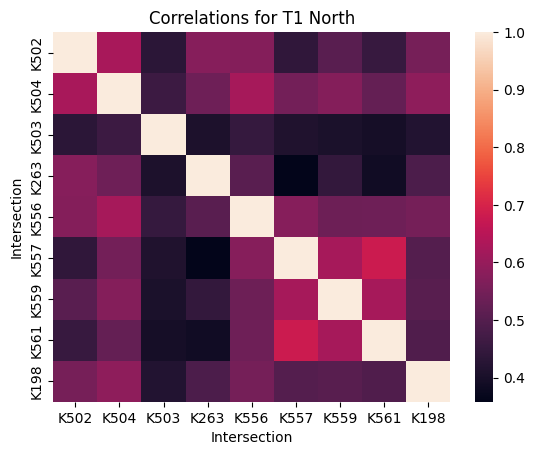

T1 South


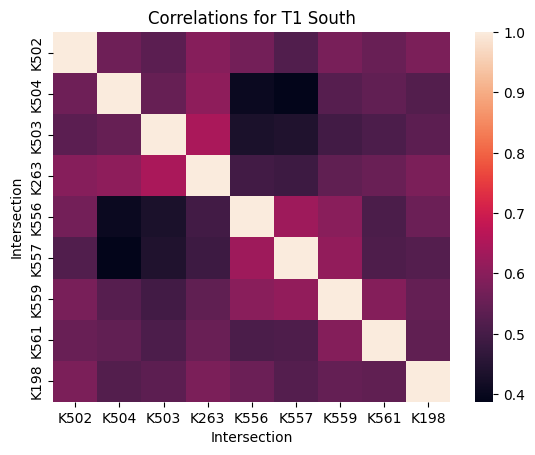

T2 South


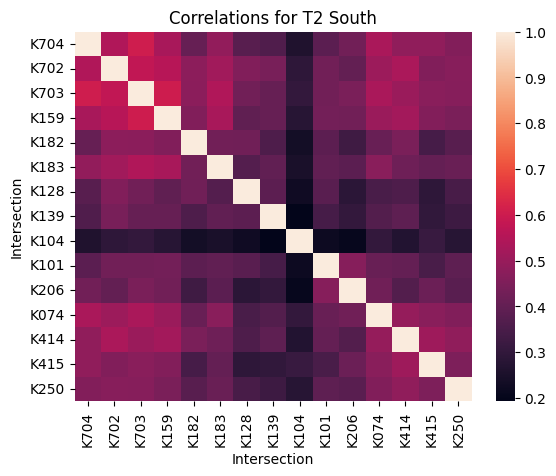

T2 North


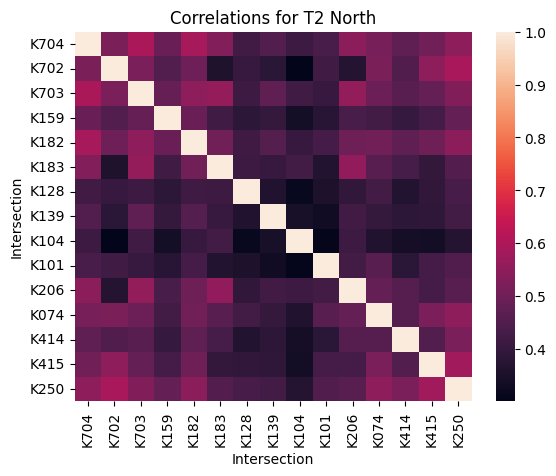

In [106]:
for trajectory in correlated_results.keys():
    for direction in correlated_results[trajectory].keys():
        print(trajectory,direction)
        df = correlated_results[trajectory][direction]
        plot_heatmap(df, trajectory,direction)

T1 North


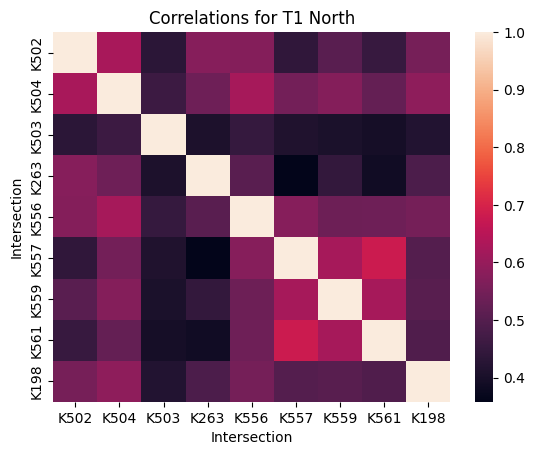

T1 South


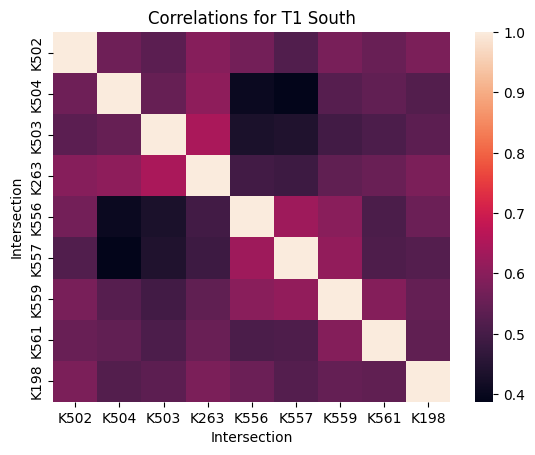

T2 South


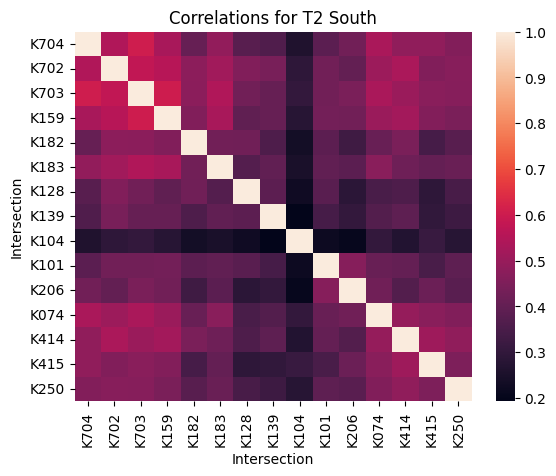

T2 North


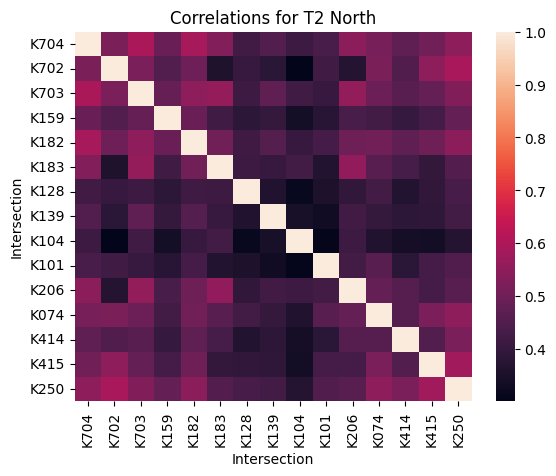

In [107]:
for trajectory in correlated_results.keys():
    for direction in correlated_results[trajectory].keys():
        print(trajectory,direction)
        df = correlated_results[trajectory][direction]
        plot_heatmap(df, trajectory,direction)

In [108]:
correlated_results['T1']['North'].corr()

,K502,K504,K503,K263,K556,K557,K559,K561,K198
K502,1.000000,0.624748,0.432870,0.575385,0.571640,0.439652,0.506642,0.452950,0.551238
K504,0.624748,1.000000,0.460322,0.540648,0.621888,0.546231,0.572613,0.525815,0.586245
K503,0.432870,0.460322,1.000000,0.406614,0.449343,0.411907,0.404719,0.394599,0.417625
K263,0.575385,0.540648,0.406614,1.000000,0.507535,0.357946,0.444937,0.387601,0.487045
K556,0.571640,0.621888,0.449343,0.507535,1.000000,0.573651,0.536437,0.541002,0.549109
K557,0.439652,0.546231,0.411907,0.357946,0.573651,1.000000,0.621550,0.679796,0.500388
K559,0.506642,0.572613,0.404719,0.444937,0.536437,0.621550,1.000000,0.622200,0.504210
K561,0.452950,0.525815,0.394599,0.387601,0.541002,0.679796,0.622200,1.000000,0.492654
K198,0.551238,0.586245,0.417625,0.487045,0.549109,0.500388,0.504210,0.492654,1.000000


In [111]:
correlated_results['T1']['South'].corr()

,K502,K504,K503,K263,K556,K557,K559,K561,K198
K502,1.000000,0.560193,0.532312,0.593675,0.568774,0.517045,0.575141,0.550446,0.579478
K504,0.560193,1.000000,0.547909,0.605794,0.404242,0.387456,0.525709,0.541011,0.520813
K503,0.532312,0.547909,1.000000,0.645234,0.431110,0.438003,0.493192,0.510654,0.533591
K263,0.593675,0.605794,0.645234,1.000000,0.493867,0.486768,0.539534,0.554568,0.580712
K556,0.568774,0.404242,0.431110,0.493867,1.000000,0.627386,0.599647,0.507246,0.557040
K557,0.517045,0.387456,0.438003,0.486768,0.627386,1.000000,0.610393,0.512529,0.522693
K559,0.575141,0.525709,0.493192,0.539534,0.599647,0.610393,1.000000,0.592073,0.545998
K561,0.550446,0.541011,0.510654,0.554568,0.507246,0.512529,0.592073,1.000000,0.539306
K198,0.579478,0.520813,0.533591,0.580712,0.557040,0.522693,0.545998,0.539306,1.000000


In [112]:
correlated_results['T2']['North'].corr()

,K704,K702,K703,K159,K182,K183,K128,K139,K104,K101,K206,K074,K414,K415,K250
K704,1.000000,0.520093,0.595313,0.490510,0.590308,0.530834,0.421601,0.449779,0.414192,0.435603,0.546212,0.512730,0.474565,0.503470,0.551222
K702,0.520093,1.000000,0.517290,0.451226,0.497837,0.356905,0.404217,0.380004,0.301188,0.419445,0.368721,0.519813,0.446495,0.549810,0.591619
K703,0.595313,0.517290,1.000000,0.485783,0.550321,0.561262,0.411884,0.475463,0.420287,0.404712,0.558287,0.492447,0.462276,0.481630,0.528864
K159,0.490510,0.451226,0.485783,1.000000,0.491711,0.418576,0.385676,0.398455,0.338290,0.377562,0.437091,0.425790,0.401968,0.429042,0.481981
K182,0.590308,0.497837,0.550321,0.491711,1.000000,0.505719,0.417388,0.455170,0.402469,0.427467,0.495052,0.502515,0.474485,0.497526,0.548973
K183,0.530834,0.356905,0.561262,0.418576,0.505719,1.000000,0.415147,0.402664,0.424533,0.365576,0.556446,0.460386,0.430617,0.395605,0.452424
K128,0.421601,0.404217,0.411884,0.385676,0.417388,0.415147,1.000000,0.361836,0.314864,0.353295,0.392648,0.425242,0.365177,0.393247,0.433686
K139,0.449779,0.380004,0.475463,0.398455,0.455170,0.402664,0.361836,1.000000,0.347207,0.333190,0.423490,0.397950,0.383982,0.388127,0.424486
K104,0.414192,0.301188,0.420287,0.338290,0.402469,0.424533,0.314864,0.347207,1.000000,0.309375,0.414931,0.361701,0.341142,0.335921,0.368167
K101,0.435603,0.419445,0.404712,0.377562,0.427467,0.365576,0.353295,0.333190,0.309375,1.000000,0.425814,0.461534,0.378726,0.429159,0.446986


In [113]:
correlated_results['T2']['South'].corr()

,K704,K702,K703,K159,K182,K183,K128,K139,K104,K101,K206,K074,K414,K415,K250
K704,1.000000,0.545213,0.603079,0.529809,0.405234,0.488430,0.376035,0.361046,0.262013,0.384923,0.427244,0.532702,0.484050,0.483846,0.458800
K702,0.545213,1.000000,0.577041,0.558372,0.479437,0.514977,0.455497,0.440117,0.293570,0.426373,0.400683,0.507888,0.533640,0.457337,0.468728
K703,0.603079,0.577041,1.000000,0.601877,0.475894,0.545424,0.427054,0.406868,0.301109,0.427531,0.442909,0.533367,0.502981,0.471341,0.464551
K159,0.529809,0.558372,0.601877,1.000000,0.456570,0.528073,0.392604,0.405935,0.275675,0.431291,0.426731,0.501870,0.519564,0.458047,0.444644
K182,0.405234,0.479437,0.475894,0.456570,1.000000,0.427653,0.426105,0.358259,0.236089,0.387577,0.326635,0.407627,0.443928,0.342350,0.377388
K183,0.488430,0.514977,0.545424,0.528073,0.427653,1.000000,0.372219,0.395776,0.249036,0.394813,0.385122,0.470629,0.420020,0.403429,0.411165
K128,0.376035,0.455497,0.427054,0.392604,0.426105,0.372219,1.000000,0.388108,0.226398,0.379567,0.285604,0.347754,0.357258,0.291475,0.345630
K139,0.361046,0.440117,0.406868,0.405935,0.358259,0.395776,0.388108,1.000000,0.192871,0.342724,0.300319,0.368923,0.389315,0.300039,0.324794
K104,0.262013,0.293570,0.301109,0.275675,0.236089,0.249036,0.226398,0.192871,1.000000,0.221191,0.207059,0.302555,0.265714,0.314480,0.275660
K101,0.384923,0.426373,0.427531,0.431291,0.387577,0.394813,0.379567,0.342724,0.221191,1.000000,0.465758,0.408223,0.401582,0.349411,0.389535
